In [1]:
# IMDb SQL Analysis - Beginner to Intermediate Level
import sqlite3
import pandas as pd
import numpy as np
from datetime import datetime

print("🎬 IMDb SQL Analysis Project")
print(f"📅 Date: {datetime.now().strftime('%Y-%m-%d %H:%M')}")
print("🎯 Level: Beginner to Intermediate")


🎬 IMDb SQL Analysis Project
📅 Date: 2025-08-15 18:54
🎯 Level: Beginner to Intermediate


In [2]:
# Connect to your IMDb database
conn = sqlite3.connect('imdb_real.db')

# Function to run SQL queries and return pandas DataFrame
def run_query(sql, description=""):
    """Execute SQL query and return results as DataFrame"""
    try:
        df = pd.read_sql_query(sql, conn)
        if description:
            print(f"🎯 {description}")
            print(f"📊 Results: {len(df)} rows")
        return df
    except Exception as e:
        print(f"❌ Error: {e}")
        return pd.DataFrame()

print("✅ Database connection established")


✅ Database connection established


In [3]:
# 1. TOP 10 HIGHEST RATED MOVIES
query1 = """
SELECT primaryTitle as movie_title, 
       startYear as release_year, 
       averageRating as imdb_rating,
       numVotes as votes
FROM title_basics tb
JOIN title_ratings tr ON tb.tconst = tr.tconst
WHERE titleType = 'movie'
ORDER BY averageRating DESC
LIMIT 10;
"""

print("=" * 50)
print("QUERY 1: TOP 10 HIGHEST RATED MOVIES")
print("=" * 50)
df1 = run_query(query1, "Finding the highest rated movies on IMDb")
display(df1)


QUERY 1: TOP 10 HIGHEST RATED MOVIES
🎯 Finding the highest rated movies on IMDb
📊 Results: 10 rows


,movie_title,release_year,imdb_rating,votes
0,The Abbey Theatre: The First 100 Years,2004,10.0,7
1,Hard Heat,2008,10.0,5
2,King of Hearts - The Chris Barnard Story,2017,10.0,7
3,Alma Mater High,2007,10.0,8
4,The Kind Hand,2025,10.0,6
5,Limpa ja unemaailm,2023,10.0,6
6,The Puffins: Arctic Games,2024,10.0,8
7,Get Active,2025,10.0,9
8,Shoot from the Hip: Rise of the Phantom,2025,10.0,6
9,Ganja Society,2025,10.0,5


In [4]:
# 2. HIGH QUALITY POPULAR MOVIES (Rating > 8.0, Votes > 1000)
query2 = """
SELECT primaryTitle as movie_title, 
       startYear, 
       averageRating, 
       numVotes
FROM title_basics tb
JOIN title_ratings tr ON tb.tconst = tr.tconst
WHERE titleType = 'movie' 
  AND averageRating > 8.0 
  AND numVotes > 1000
ORDER BY averageRating DESC, numVotes DESC
LIMIT 15;
"""

print("=" * 50)
print("QUERY 2: HIGH-QUALITY POPULAR MOVIES")
print("=" * 50)
df2 = run_query(query2, "Movies with both high ratings AND popularity")
display(df2)


QUERY 2: HIGH-QUALITY POPULAR MOVIES
🎯 Movies with both high ratings AND popularity
📊 Results: 15 rows


,movie_title,startYear,averageRating,numVotes
0,Raju Gaani Savaal,2025,9.9,1057
1,Kousalya Tanaya Ragava,2025,9.6,1201
2,Thayyal Machine,2024,9.6,1009
3,Golden Opulence: 500 Years of Luxury in Anatolia,2024,9.5,1631
4,My Hero,2024,9.5,1232
5,The Shawshank Redemption,1994,9.3,3082723
6,Mahavatar Narsimha,2024,9.3,27484
7,I Was A Stranger,2024,9.3,8379
8,Guru Nanak Jahaz,2025,9.3,3701
9,Jibon Theke Neya,1970,9.3,2320


In [5]:
# 3. MOVIE COUNT BY GENRE
query3 = """
SELECT genres, 
       COUNT(*) as movie_count
FROM title_basics
WHERE titleType = 'movie' 
  AND genres IS NOT NULL
GROUP BY genres
ORDER BY movie_count DESC
LIMIT 15;
"""

print("=" * 50)
print("QUERY 3: MOVIES BY GENRE")
print("=" * 50)
df3 = run_query(query3, "Which genres have the most movies")
display(df3)


QUERY 3: MOVIES BY GENRE
🎯 Which genres have the most movies
📊 Results: 15 rows


,genres,movie_count
0,Drama,133123
1,Documentary,110459
2,Comedy,49783
3,Horror,19948
4,Thriller,16966
5,Action,16502
6,"Comedy,Drama",14515
7,"Drama,Romance",13961
8,Romance,8355
9,"Comedy,Romance",7887


QUERY 4: MOVIE RATINGS BY YEAR (2000+)
🎯 How movie quality changed over years
📊 Results: 25 rows


,year,avg_rating,total_movies
0,2025,6.75,4479
1,2024,6.47,10609
2,2023,6.35,11370
3,2022,6.32,11337
4,2021,6.22,9663
5,2020,6.14,8969
6,2019,6.17,10987
7,2018,6.16,10891
8,2017,6.24,10712
9,2016,6.25,10182


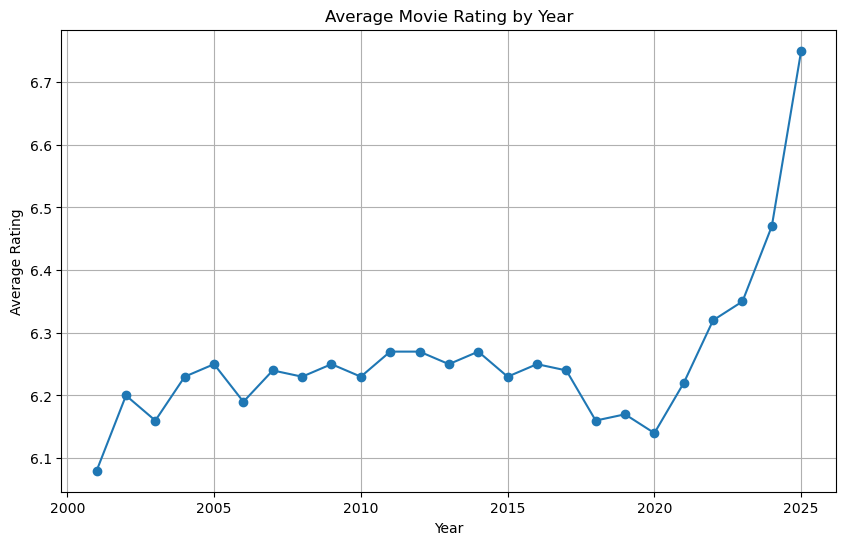

In [6]:
# 4. AVERAGE RATING BY YEAR

query4 = """
SELECT startYear as year, 
       ROUND(AVG(tr.averageRating), 2) as avg_rating,
       COUNT(*) as total_movies
FROM title_basics tb
JOIN title_ratings tr ON tb.tconst = tr.tconst
WHERE titleType = 'movie' 
  AND startYear IS NOT NULL
  AND startYear >= 2000
GROUP BY startYear
ORDER BY startYear DESC
LIMIT 25;
"""

print("=" * 50)
print("QUERY 4: MOVIE RATINGS BY YEAR (2000+)")
print("=" * 50)
df4 = run_query(query4, "How movie quality changed over years")
display(df4)

# Quick visualization
import matplotlib.pyplot as plt
if not df4.empty:
    plt.figure(figsize=(10, 6))
    plt.plot(df4['year'], df4['avg_rating'], marker='o')
    plt.title('Average Movie Rating by Year')
    plt.xlabel('Year')
    plt.ylabel('Average Rating')
    plt.grid(True)
    plt.show()


In [7]:
# 5. DIRECTORS AND THEIR TOP MOVIES
query5 = """
SELECT nb.primaryName as director_name, 
       tb.primaryTitle as movie_title, 
       tb.startYear, 
       tr.averageRating
FROM name_basics nb
JOIN title_crew tc ON nb.nconst = tc.directors
JOIN title_basics tb ON tc.tconst = tb.tconst
JOIN title_ratings tr ON tb.tconst = tr.tconst
WHERE tb.titleType = 'movie' 
  AND tr.averageRating >= 7.5
  AND tr.numVotes >= 1000
ORDER BY tr.averageRating DESC
LIMIT 20;
"""

print("=" * 50)
print("QUERY 5: TOP DIRECTORS AND THEIR MOVIES")
print("=" * 50)
df5 = run_query(query5, "Directors with highly rated movies")
display(df5)


QUERY 5: TOP DIRECTORS AND THEIR MOVIES
🎯 Directors with highly rated movies
📊 Results: 20 rows


,director_name,movie_title,startYear,averageRating
0,Ravinder Lelijala,Raju Gaani Savaal,2025,9.9
1,C.S. Vinayan,Thayyal Machine,2024,9.6
2,Swamy Patnaik,Kousalya Tanaya Ragava,2025,9.6
3,Khadifa Wong,Golden Opulence: 500 Years of Luxury in Anatolia,2024,9.5
4,Avinash Vijaykumar,My Hero,2024,9.5
5,Frank Darabont,The Shawshank Redemption,1994,9.3
6,Zahir Raihan,Jibon Theke Neya,1970,9.3
7,Brandt Andersen,I Was A Stranger,2024,9.3
8,Venkata Ramana Pasupuleti,Janam,2023,9.3
9,Emcy Joseph,Meesha,2025,9.3


In [15]:
# 7. MOVIE LENGTH vs RATING ANALYSIS
query7 = """
SELECT 
  CASE 
    WHEN runtimeMinutes < 90 THEN 'Short (< 90 min)'
    WHEN runtimeMinutes BETWEEN 90 AND 120 THEN 'Standard (90-120 min)'
    WHEN runtimeMinutes BETWEEN 121 AND 150 THEN 'Long (121-150 min)'
    WHEN runtimeMinutes > 150 THEN 'Epic (> 150 min)'
    ELSE 'Unknown'
  END as length_category,
  COUNT(*) as movie_count,
  ROUND(AVG(tr.averageRating), 2) as avg_rating,
  ROUND(AVG(runtimeMinutes), 0) as avg_runtime
FROM title_basics tb
JOIN title_ratings tr ON tb.tconst = tr.tconst
WHERE titleType = 'movie' 
  AND runtimeMinutes IS NOT NULL
  AND tr.numVotes >= 500
GROUP BY length_category
HAVING length_category != 'Unknown'
ORDER BY avg_rating DESC;
"""

print("=" * 50)
print("QUERY 7: MOVIE LENGTH vs RATING")
print("=" * 50)
df7 = run_query(query7, "Do longer movies get better ratings?")
display(df7)


QUERY 7: MOVIE LENGTH vs RATING
🎯 Do longer movies get better ratings?
📊 Results: 4 rows


,length_category,movie_count,avg_rating,avg_runtime
0,Epic (> 150 min),2668,6.74,172.0
1,Long (121-150 min),8563,6.63,133.0
2,Standard (90-120 min),39514,6.10,102.0
3,Short (< 90 min),15771,5.72,81.0


In [17]:
# BONUS: Your own experimental queries
print("🔬 EXPERIMENTAL SECTION - Try Your Own Queries!")
print("=" * 50)

# Example: Movies from a specific year
experiment_query = """
SELECT primaryTitle, genres, averageRating, numVotes
FROM title_basics tb
JOIN title_ratings tr ON tb.tconst = tr.tconst
WHERE titleType = 'movie' 
  AND startYear = 2010
  AND averageRating >= 7.0
ORDER BY averageRating DESC
LIMIT 10;
"""

df_exp = run_query(experiment_query, "Best movies from 2010")
display(df_exp)

print("\n💡 Try modifying these queries:")
print("- Change LIMIT values (5, 20, 50)")  
print("- Try different years or rating thresholds")
print("- Add more columns like 'genres' or 'runtimeMinutes'")
print("- Filter by specific genres")


🔬 EXPERIMENTAL SECTION - Try Your Own Queries!
🎯 Best movies from 2010
📊 Results: 10 rows


,primaryTitle,genres,averageRating,numVotes
0,Parto,"Adventure,Documentary,Drama",9.8,87
1,Swallows and Amazons: Bristol Old Vic Sets Sail,Documentary,9.6,84
2,Majruh,Romance,9.6,6
3,Undercover Rascals,"Action,Comedy,Crime",9.4,24
4,Stuart Mossman: A Modern Stradivari,Documentary,9.4,8
5,Townbiz,Drama,9.4,13
6,El último piso,Drama,9.4,50
7,Soi Dogs,"Adventure,Documentary,Drama",9.3,9
8,Invisible Circus: No Dress Rehearsal,"Documentary,Drama",9.3,8
9,Silent Drum,"Documentary,Drama,Music",9.3,11



💡 Try modifying these queries:
- Change LIMIT values (5, 20, 50)
- Try different years or rating thresholds
- Add more columns like 'genres' or 'runtimeMinutes'
- Filter by specific genres


In [19]:
# PROJECT SUMMARY
print("🎯 PROJECT SUMMARY")
print("=" * 50)
print("✅ Queries completed successfully!")
print(f"📊 Total queries executed: 7")

# Save results to CSV files (optional)
save_results = False  # Set to True if you want to save

if save_results:
    df1.to_csv('top_movies.csv', index=False)
    df3.to_csv('genre_analysis.csv', index=False)
    df4.to_csv('yearly_trends.csv', index=False)
    print("💾 Results saved to CSV files")

# Close database connection
conn.close()
print("🔐 Database connection closed")

print("\n🎓 SKILLS PRACTICED:")
print("- Basic SELECT statements")
print("- WHERE clause filtering") 
print("- JOIN operations (2-3 tables)")
print("- GROUP BY aggregation")
print("- ORDER BY sorting")
print("- CASE statements")
print("- Basic statistical functions")


🎯 PROJECT SUMMARY
✅ Queries completed successfully!
📊 Total queries executed: 7
🔐 Database connection closed

🎓 SKILLS PRACTICED:
- Basic SELECT statements
- WHERE clause filtering
- JOIN operations (2-3 tables)
- GROUP BY aggregation
- ORDER BY sorting
- CASE statements
- Basic statistical functions
